In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [18]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Box plot**

- box plot is used to identify the outliers
- outliers is an observation having huge positive value or huge negative value
- Q1 = 25p ,Q2 = 50p, Q3=75p
- IQR - inter quartile range= Q3-Q1
- Q3+1.5* IQR and Q1-1.5*IQR

In [19]:
# Read the prevailaing wage data and plot the box plot

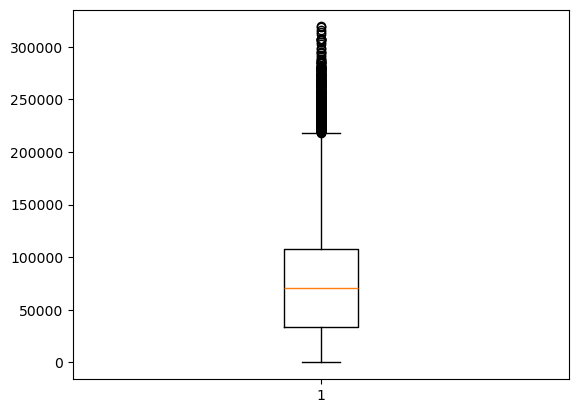

In [20]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=True)
plt.show()

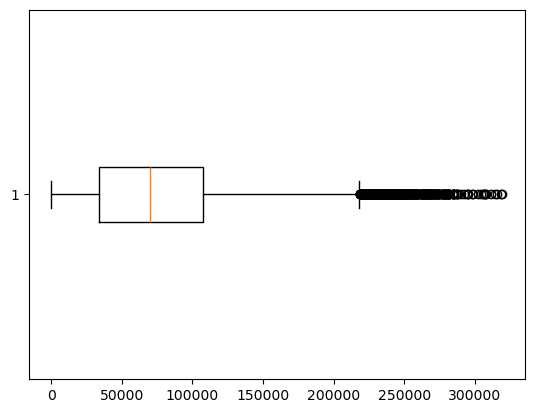

In [21]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.show()

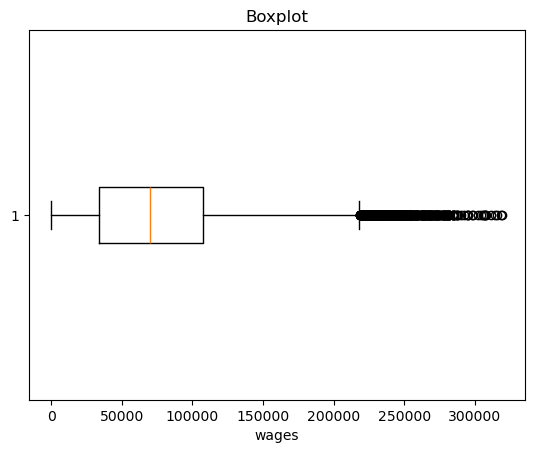

In [22]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

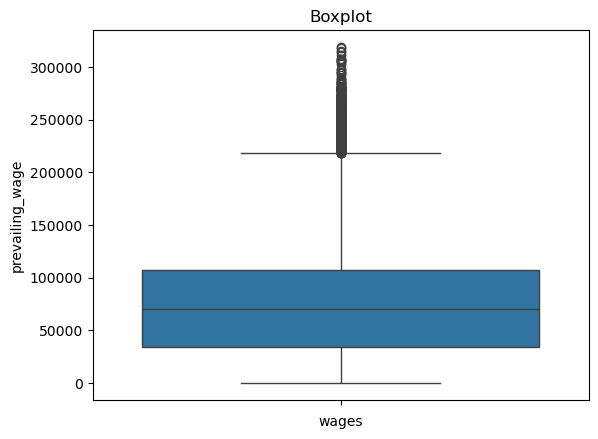

In [23]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

**plot the histogram and box plot side by side**

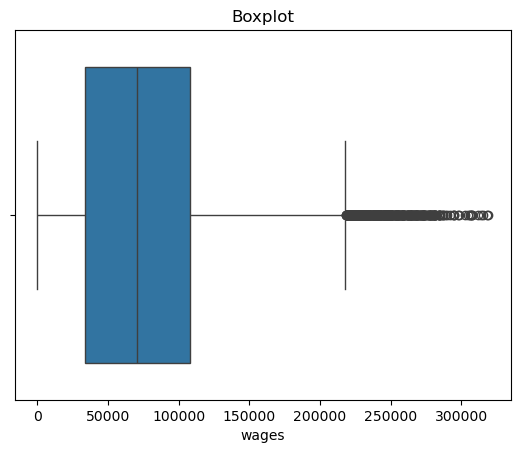

In [24]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

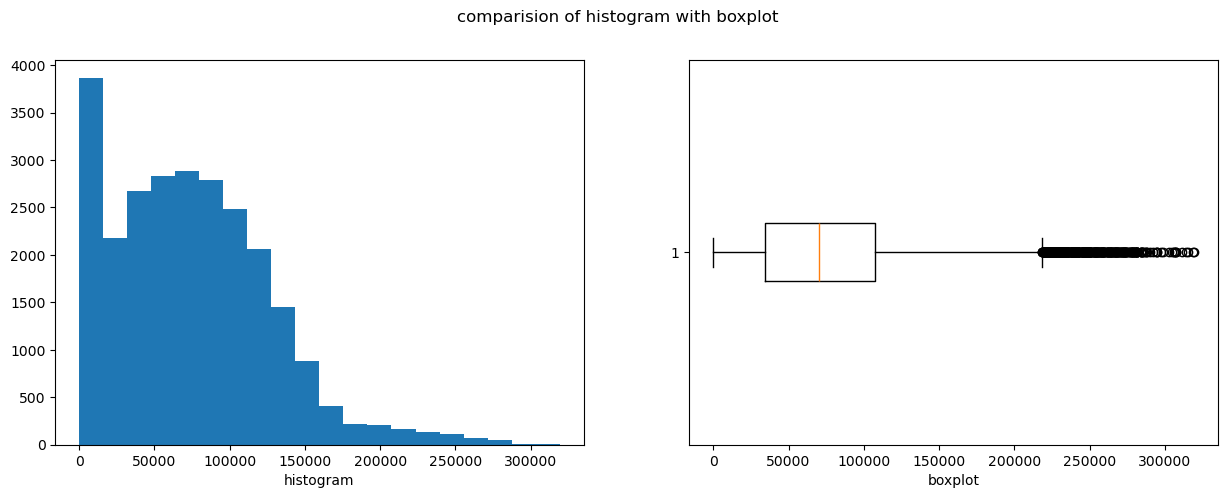

In [25]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(15,5))
plt.suptitle('comparision of histogram with boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

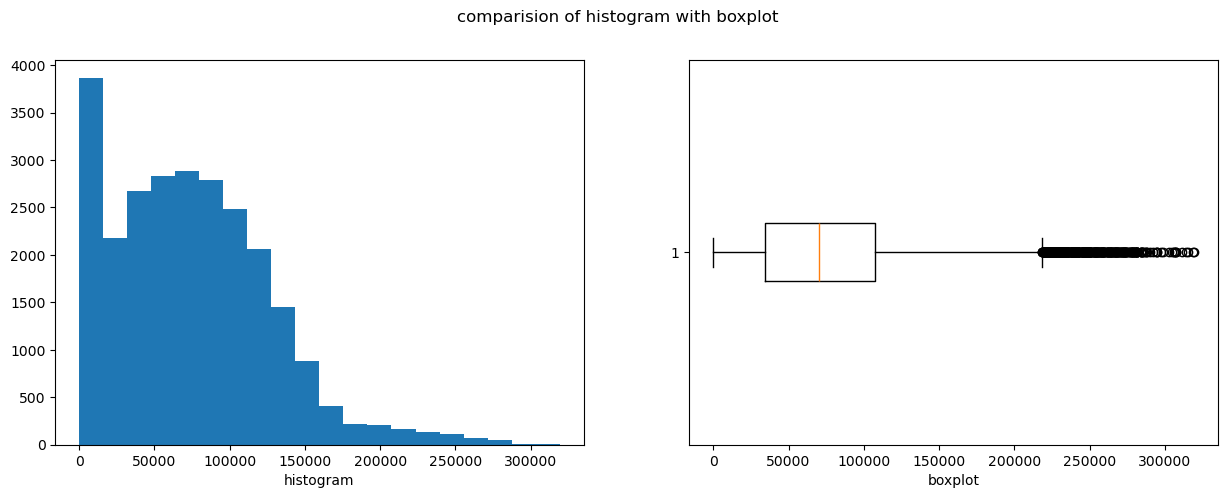

In [26]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(15,5))
plt.suptitle('comparision of histogram with boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**finding the outliers of data**

- we already know that outliers are avaiable less than Q1-1.5*IQR and Q3+1.5*IQR
- step-1:
   - calculate q1=25p
   - calculate q2=50p
   - calculate q3=75p
- step-2:
   - calculate LB=q1-1.5*IQR
- step-3:
   - calculate lb=q1-1.5*IQR
   - calculate ub-q3+1.5*IQR
- step-4:
   - con1=wage data<lb
   - con2=wage data>ub
   - con3=con1 or con2 (use bitwise operator)
-step-5:
  - data[con3]

In [27]:
wage_data=visa_df['prevailing_wage']
# step-1

q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

# step-2

IQR=q3-q1

# step-3

lb= q1-1.5*IQR
ub= q3+1.5*IQR

#step-4

con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2

# bitwise operator used to compare
# bits data === 0 and 1 == true false

# step-5

outliers_data=wage_data[con3]
outliers_data

outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


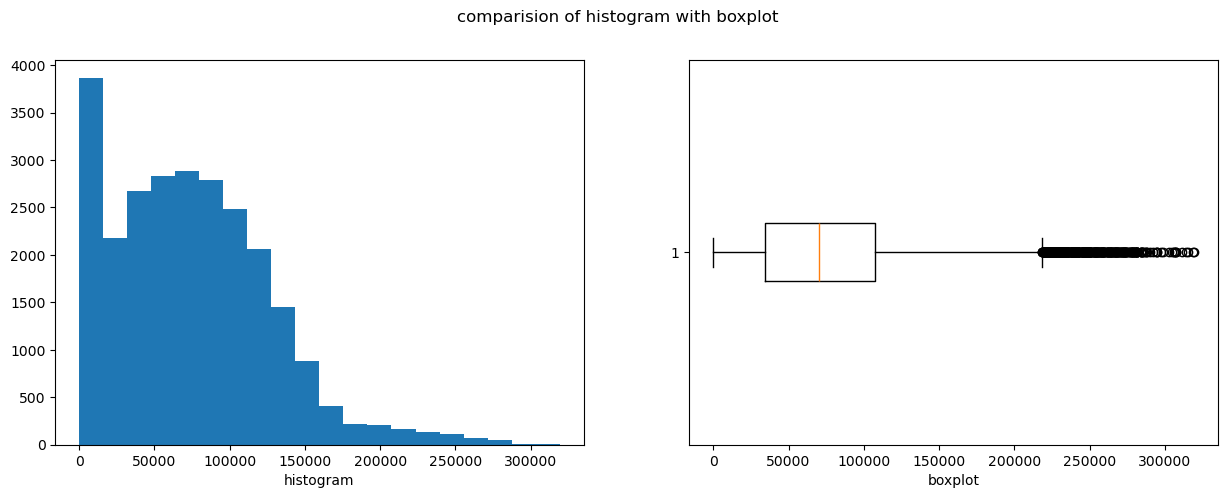

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [28]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(15,5))
plt.suptitle('comparision of histogram with boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()
# step-1

q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

# step-2

IQR=q3-q1

# step-3

lb= q1-1.5*IQR
ub= q3+1.5*IQR

#step-4

con1=wage_data>lb
con2=wage_data<ub
con3=con1&con2

# bitwise operator used to compare
# bits data === 0 and 1 == true false

# step-5

non_outliers_df=visa_df[con3]
non_outliers_df

- we have 2 data frames
- visa_df : total data 25480
- non_outliers_df = after removing outliers 25053
- first plot nonoutliers data prevailing wage historgam and

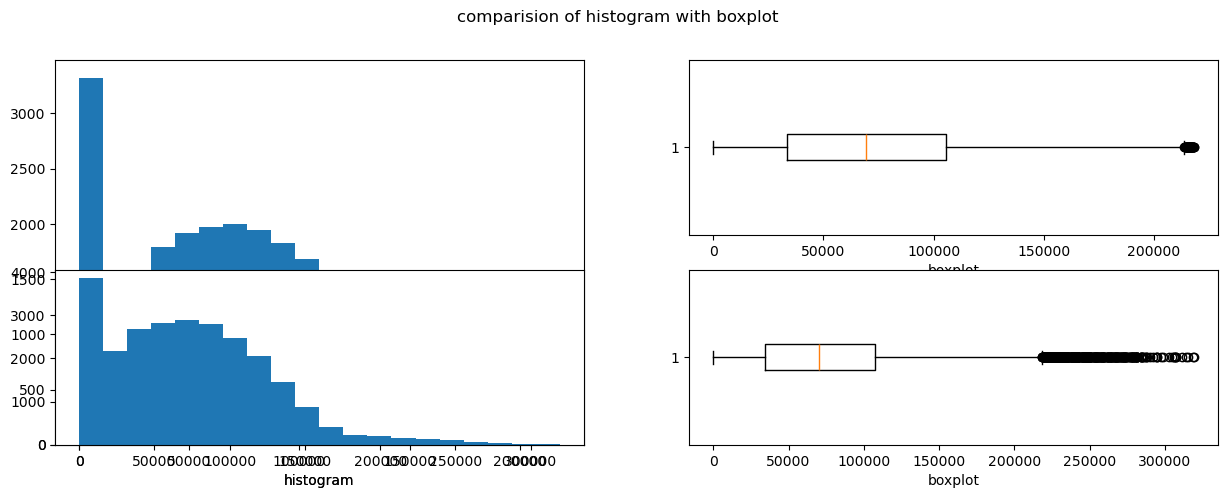

In [29]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(15,5))
plt.suptitle('comparision of histogram with boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')

plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

In [ ]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_

**how to deal outliers**

- we can drop the outliers
- droping outliers is an easy task, but not recomended
- if you drop the outliers we are droping the rows
- 

In [31]:
dict1={'sub':['DS','DE','CS'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [ ]:
# Q) i want to replace marks with 1 which are greater than 100

In [33]:
con=df['marks']>100
l=np.where(con1

TypeError: where() missing 1 required positional argument: 'condition'

In [34]:
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1|con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [35]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

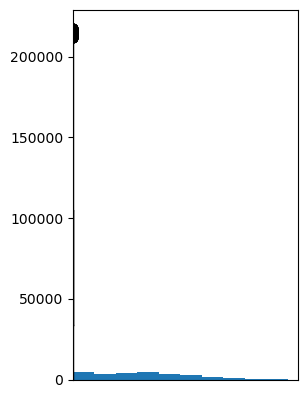

In [37]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,1).hist(visa_df['prevailing_wage_update'])

                        